# Libraries

In [110]:
%load_ext autoreload
%autoreload 2
from pendulum import DoublePendulum
import torch
from IPython.display import HTML
from models import MyLSTM, OneStep
from animation_utils import make_anim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define the parameters of the model

In [131]:
# These are the masses and lengths of the pendulum
# Number of points is the number of points in the trajectory
params = {
    'm1' : 2,
    'm2' : 1,
    'l1' : 1.4,
    'l2' : 1,
    'g' : 9.8,
    'number_of_points' : 1500
}

In [155]:
double_pendulum = DoublePendulum(**params)
trajectory = double_pendulum.compute_trajectory(theta1=-0.2, theta2=0.2)

The double pendulum is initialized with the following physical parameters:
m1 =  2 kg m2 =  1 kg l1 =  1.4 m l2 =  1 m g =  9.8 m/s^2 number of points =  1500
Trajectory computed


# Pretrained model

In [156]:
model = MyLSTM()
model.load_state_dict(torch.load('models/lstm-pend2'))

<All keys matched successfully>

data set length = 1500
1500
-0.07946773231802445 -2.35215978681898
mean error = 21.4438015142937
maxerr = 3.651519437863735  at  281


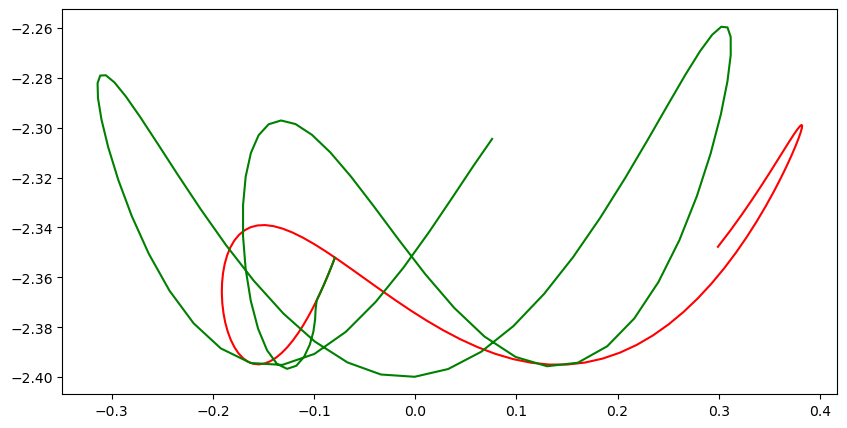

In [157]:
actual_predictions = OneStep(double_pendulum, trajectory, model, steps=100)

# Animation

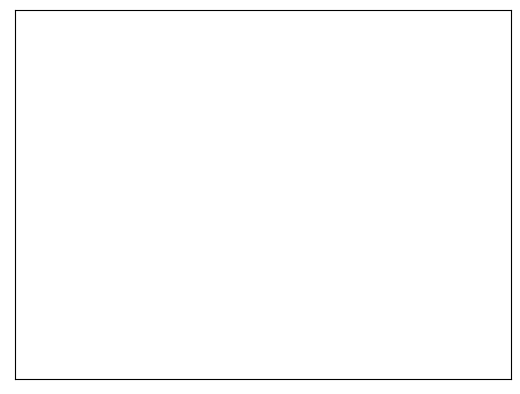

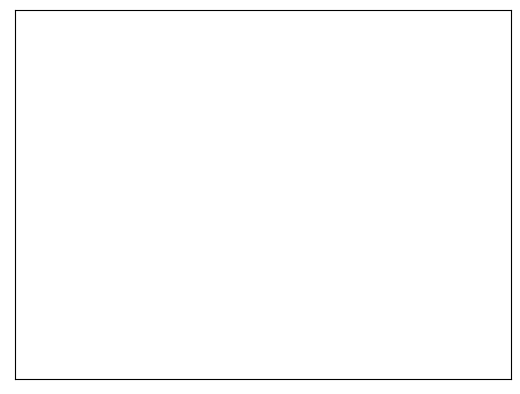

In [158]:
anim = make_anim(double_pendulum, trajectory)
anim2 = make_anim(double_pendulum, actual_predictions)

In [159]:
HTML(anim2.to_html5_video())